In [8]:
import os
import numpy as np
import pandas as pd
import uproot as ur

import sys
sys.path.append('..')
from jupyter_utils import *

from matplotlib import pyplot as plt
from IPython.display import Image
pd.set_option('display.max_columns', None) # to see all columns of df.head()
pd.set_option('display.max_rows', None)

# Lauren's colors
L_colors = ['red', 'darkorange', 'limegreen', 'green', 'deepskyblue', 'blue', 'black']
L_linestyles = ['solid', 'dashed']

In [9]:
# trk and jet pt bins
trk_pt_lo = [0, 1, 2, 5]
trk_pt_hi = [1, 2, 5, 20]

jet_pt_lo = [10, 20, 40]
jet_pt_hi = [20, 40, 60]
jet_pt_sel = 1


In [10]:
# file defs

base_dir = "/global/cfs/cdirs/alice/kdevero/"
#fs = [base_dir+"pp_jet-trk/19012324/merged.root"]#, "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
fs = ["./pythia/pt10_R0p4_s5p02.root", base_dir+"pp_jet-trk/20739208/merged.root"] #, "5020_PbPb_0-5/merged.root", "5020_PbPb_40-50/merged.root"]
#fs = ["./output_data/AnalysisResults.root"]
f_names = ["pythia pp", "ALICE pp", "Pb+Pb, 0-5%", "Pb+Pb, 40-50%"]

n_jetpt = "h_jet_pt_JetPt_R0.4_0.15"
n_shape_pt = "h_jet-trk_shape_RL_TrkPt_JetPt_R0.4_0.15"
n_shape_z = "h_jet-trk_shape_RL_z_JetPt_R0.4_0.15"
n_ptprofile_pt = "h_jet-trk_ptprofile_RL_TrkPt_JetPt_R0.4_0.15"
n_ptprofile_z = "h_jet-trk_ptprofile_RL_z_JetPt_R0.4_0.15"


Njets : 51693.0
201
50
51
Njets : 5408.0
201
50
51
Njets : 318.0
201
50
51
Njets : 41726.0
201
Njets : 3325.0
201
Njets : 206.0
201


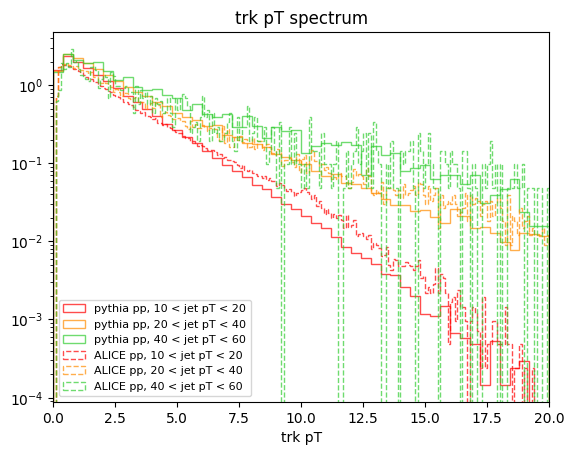

In [20]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    N_jets_pt = []
    for jetpti in range(len(jet_pt_lo)):
        h = f[n_jetpt]
        h_jetpt = h.to_numpy()[0]
        pt_range = (findbin(h.axis("x"), jet_pt_lo[jetpti]), findbin(h.axis("x"), jet_pt_hi[jetpti]))
        h_jetpt = h_jetpt[pt_range[0]:pt_range[1]]
        N_jets = np.sum(h_jetpt)
        print("Njets : " + str(N_jets))

        h = f[n_shape_pt]
        bin_edges = h.axis("y").edges()
        bin_width = bin_edges[1] - bin_edges[0]
        
        h_numpy = h.to_numpy()[0]
        pt_range = (findbin(h.axis("z"), jet_pt_lo[jetpti]), findbin(h.axis("z"), jet_pt_hi[jetpti]))
        h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
        this_slice = projectionY(h_numpy)
        this_slice = this_slice / (bin_width * N_jets)
        
        print(len(bin_edges))
        
        if fi == 0:
            this_slice, bin_edges = rebin(this_slice, bin_edges, 4)
            print(len(this_slice))
            print(len(bin_edges))
            
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[jetpti], label='{}, {} < jet pT < {}'.format(f_names[fi], jet_pt_lo[jetpti], jet_pt_hi[jetpti]))

plt.legend(loc='lower left', prop={'size': 8})
plt.title("trk pT spectrum") 
plt.xlabel('trk pT')
plt.xlim(0, 20)
#plt.ylim(1E-1, 1E2)
#plt.xscale('log')
plt.yscale('log')
plt.show()


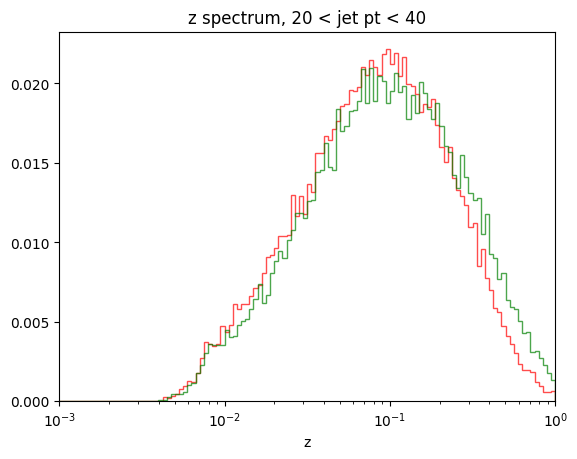

In [12]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("y").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = zslice(h_numpy, pt_range[0], pt_range[1])
        
    this_slice = projectionY(h_numpy)
    this_slice = this_slice / np.sum(this_slice)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
    plt.title("z spectrum, {} < jet pt < {}".format(jet_pt_lo[jet_pt_sel], jet_pt_hi[jet_pt_sel]) )
    plt.xlabel('z')
    plt.xlim(1e-3, 1)
    plt.xscale('log')
    #plt.yscale('log')
plt.show()
    

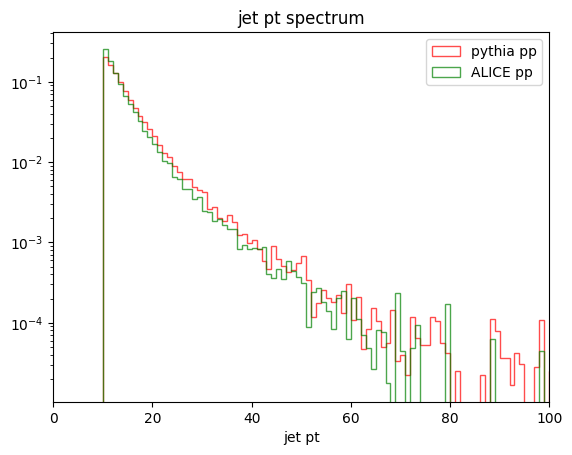

In [13]:
for fi in range(len(fs)):
    f = ur.open(fs[fi])
    
    h = f[n_shape_z]
    bin_edges = h.axis("z").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    h_numpy = h.to_numpy()[0]
    this_slice = projectionZ(h_numpy)
    this_slice = this_slice / np.sum(this_slice)
    plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*fi], label=f_names[fi])
    
    plt.title("jet pt spectrum") 
    plt.xlabel('jet pt')
    plt.legend(loc="upper right")
    plt.xlim(0, 100)
    #plt.xscale('log')
    plt.yscale('log')
plt.show()
    

In [14]:
h_jetpt = []
h_shape_pt = []
h_shape_pt_np = []
h_shape_z = []
h_shape_z_pt = []
h_ptprofile_pt = []
h_ptprofile_pt_np = []
N_jets = []

for fi in range(len(fs)):
    f = ur.open(fs[fi])

    # jet pt histogram
    h = f[n_jetpt]
    pt_range = (findbin(h.axis("x"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("x"), jet_pt_hi[jet_pt_sel]))
    print(pt_range)
    
    h = h.to_numpy()[0]
    h = h[pt_range[0]:pt_range[1]]
    h_jetpt.append(h)
    print("Njets : " + str(np.sum(h)))
    N_jets.append(np.sum(h))

    # R, trk pt, jet pt histogram
    h = f[n_shape_pt]
    h_shape_pt.append(h)
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))

    h = h.to_numpy()[0]
    h_shape_pt_np.append(zslice(h,pt_range[0],pt_range[1]))
    
    # same as above, but pt weighted
    h = f[n_ptprofile_pt]
    h_ptprofile_pt.append(h)
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))

    h = h.to_numpy()[0]
    h_ptprofile_pt_np.append(zslice(h,pt_range[0],pt_range[1]))

    # R, trk pt, jet pt histogram
    # TODO


(20, 40)
Njets : 5408.0
(20, 40)
Njets : 3325.0


(0, 10)
11217.0
(10, 20)
9935.0
(20, 50)
13737.0
(50, 200)
8129.0
(0, 10)
4994.0
(10, 20)
4602.0
(20, 50)
6550.0
(50, 200)
5010.0


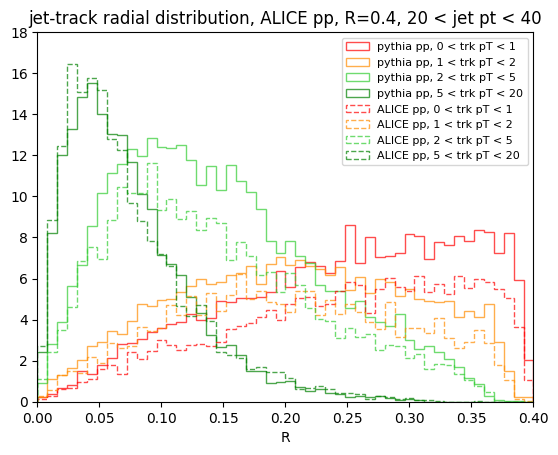

In [16]:
for fi in range(len(fs)):
    bin_edges = h_shape_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    h_numpy = h_shape_pt_np[fi]
    
    h_trk = []
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[i]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)

        this_slice = yslice(h_numpy, trk_pt_range[0], trk_pt_range[1])
        print(np.sum(this_slice))
        this_slice = this_slice / (N_jets[fi] * bin_width)

        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[i], trk_pt_hi[i]))
        h_trk.append(this_slice)

plt.legend(loc='upper right', prop={'size': 8})
plt.title("jet-track radial distribution, " + f_names[fi] + ", R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 18)
#plt.ylim(0, 0.5)
plt.show()


[     0.           1368.16711526   5554.29101383  11619.42548719
  18256.11922147  25373.92484141  32926.23681247  39993.30182109
  46647.91621199  53164.1107907   59244.94505342  64739.46433799
  70000.74718712  74548.14928057  78787.60652285  82919.59178928
  86588.78305141  89779.6364421   92780.01938505  95516.00803757
  98409.66179534 101087.14624045 103470.52919221 105651.00998343
 107527.03713761 109356.89131686 111172.4216516  112903.40269602
 114522.40281043 116004.13946282 117327.74577409 118710.85551079
 119904.86249585 121151.42633017 122255.90802835 123358.22887233
 124406.31096509 125439.48931162 126371.47605162 127216.55114662
 128017.64787327 128791.68569629 129507.2670753  130154.46264935
 130728.09604487 131280.15713195 131786.33101915 132144.23458242
 132417.53023769]
[    0.           822.97037366  3591.93139993  7335.32491
 11907.95900553 16178.55601352 20557.23635484 24656.43481784
 28160.52421436 31641.16669482 34417.94443597 37105.11821921
 39661.50496216 41982.

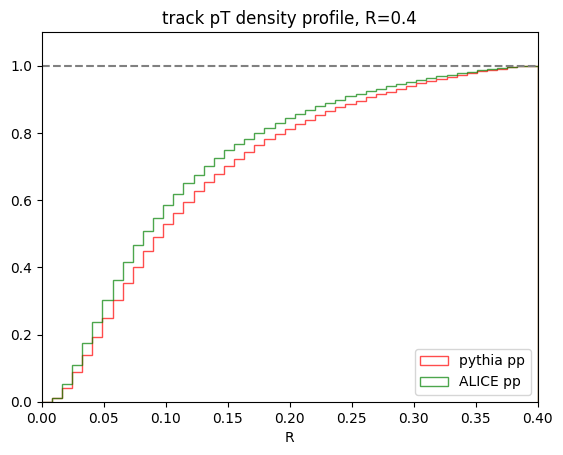

In [17]:
hs = []
for i in range(len(fs)):
    f = ur.open(fs[i])
    h = f[n_ptprofile_pt]
    
    h_numpy = h.to_numpy()[0]
    pt_range = (findbin(h.axis("z"), jet_pt_lo[jet_pt_sel]), findbin(h.axis("z"), jet_pt_hi[jet_pt_sel]))
    h_numpy = projectionX(zslice(h_numpy, pt_range[0], pt_range[1]))

    n_r_bins = 50
    bin_edges = np.linspace(0, 0.4, n_r_bins)
    bin_widths = 0.4 / n_r_bins
    
    h_to_graph = np.array([np.sum(h_numpy[0:findbin(h.axis("x"), bin_edges[i])]) for i in range(n_r_bins-1)])
    print(h_to_graph)
    
    # normalization by inclusive RL selection
    h_to_graph = h_to_graph / h_to_graph[len(h_to_graph)-1]
    hs.append(h_to_graph)
    
    plt.hist(bin_edges[:-1], bin_edges, weights=h_to_graph, lw=1, histtype = 'step', alpha=0.7, fill=False, color=L_colors[3*i], label=f_names[i])
    
plt.axhline(1, linestyle='--', color='gray')
plt.legend(loc='lower right')
plt.title("track pT density profile, R=0.4") 
plt.xlabel('R')
plt.xlim(0, 0.4)
plt.ylim(0, 1.1)
plt.show()


(0, 10)
(0, 20)
(0, 50)
(0, 200)
(0, 10)
(0, 20)
(0, 50)
(0, 200)


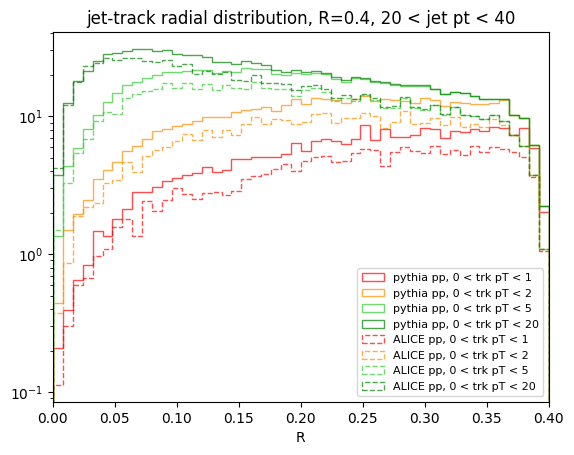

In [18]:
for fi in range(len(fs)):
    
    bin_edges = h_shape_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    hnumpy = h_shape_pt_np[fi]
    
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[0]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)
        
        this_slice = yslice(hnumpy, trk_pt_range[0], trk_pt_range[1])
        this_slice = this_slice / (N_jets[fi] * bin_width)
        
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[0], trk_pt_hi[i]))
    
plt.legend(loc='lower right', prop={'size': 8})
plt.title("jet-track radial distribution, R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e0, 3e3)
plt.show()

(0, 10)
(0, 20)
(0, 50)
(0, 200)
(0, 10)
(0, 20)
(0, 50)
(0, 200)


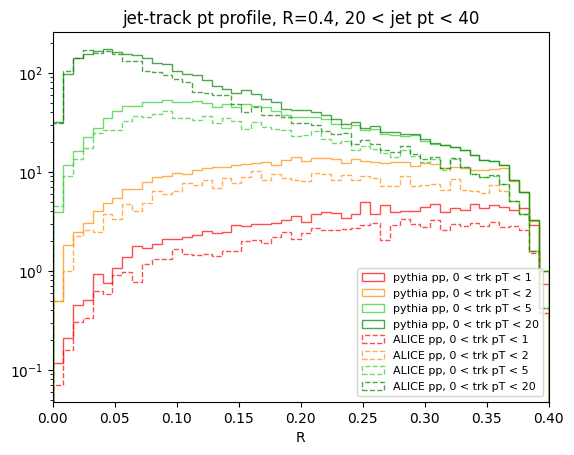

In [19]:
for fi in range(len(fs)):
    
    bin_edges = h_ptprofile_pt[fi].axis("x").edges()
    bin_width = bin_edges[1] - bin_edges[0]
    
    hnumpy = h_ptprofile_pt_np[fi]
    
    for i in range(len(trk_pt_lo)):
        trk_pt_range = (findbin(h_shape_pt[fi].axis("y"), trk_pt_lo[0]), findbin(h_shape_pt[fi].axis("y"), trk_pt_hi[i]))
        print(trk_pt_range)
        
        this_slice = yslice(hnumpy, trk_pt_range[0], trk_pt_range[1])
        this_slice = this_slice / (N_jets[fi] * bin_width)
        
        plt.hist(bin_edges[:-1], bin_edges, weights=this_slice, lw=1, histtype = 'step', linestyle=L_linestyles[fi], alpha=0.7, fill=False, color=L_colors[i], label='{}, {} < trk pT < {}'.format(f_names[fi], trk_pt_lo[0], trk_pt_hi[i]))
    
plt.legend(loc='lower right', prop={'size': 8})
plt.title("jet-track pt profile, R=0.4, {} < jet pt < {}".format(str(jet_pt_lo[jet_pt_sel]), str(jet_pt_hi[jet_pt_sel]))) 
plt.xlabel('R')
plt.yscale("log")
plt.xlim(0, 0.4)
#plt.ylim(5e0, 3e3)
plt.show()